# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `4` | `Questions`

> "Hi Team! 👋

> The current notebook contains 10 questions that help you review our course content.

> Each question asks you to answer with specific results. Some questions are the `reverse-engineering-type` questions as I have asked in exercise problem set 3. Other questions require direct answers (because, given the nature of the question, reverse-engineering is not feasible).

> These questions won’t be difficult to solve—and answering them will strengthen your understanding of the learning materials. Importantly, the pathway to each answer has been given in lecture scripts, in-class lessons, answers to discussion board questions, and assigned readings. 

> First try to answer to the questions without setting any time constraints. Then, remove all your answers and try to answer again within a 90-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [3]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

### <font color = red> Question 1</font>. Please import historical stock data from the web on the following financial instruments, and create the following DataFrame that contains adjusted closing prices. 

### Here, the timeframe should be set between the 13th of October 2014 through the 13th of September 2022 (nine years of data).

- `WMT` Stock of Walmart
- `IBM` Stock of IBM

In [41]:
(
    yf
    .pdr_override()
)

In [42]:
stocks = ["IBM", "WMT"]

In [43]:
def extract_data(stocks, start, end):
    def data(stock):
        return pdr.get_data_yahoo(stock, start=start, end=end)
    
    stocks_map = map(data, stocks)
    return(pd.concat(stocks_map, keys = stocks, names= ["Tickers", "Date"]))

In [44]:
stocks_info = extract_data(stocks, dt.datetime(2014,10,13), dt.datetime(2022,9,14))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [47]:
stocks_info = stocks_info[["Adj Close"]].reset_index().pivot(index = "Date", columns = "Tickers", values="Adj Close")

In [48]:
stocks_info

Tickers,IBM,WMT
Date,,
2014-10-13,118.635635,64.138123
2014-10-14,118.816605,64.485435
2014-10-15,117.491440,62.186527
2014-10-16,116.256706,61.045334
2014-10-17,117.685364,61.276890
...,...,...
2022-09-07,121.597427,133.693283
2022-09-08,122.321060,134.372849
2022-09-09,123.006599,134.776672


Tickers,IBM,WMT
Date,,
2014-10-13,124.599342,65.120033
2014-10-14,124.789429,65.472664
2014-10-15,123.397575,63.138546
2014-10-16,122.100822,61.979893
2014-10-17,123.601288,62.214996
...,...,...
2022-09-07,127.709999,135.740005
2022-09-08,128.470001,136.429993
2022-09-09,129.190002,136.839996


### <font color = red> Question 2</font>. Please run a simple moving average crossover strategy for `IBM`.

### The two moving windows are 20 and 60 days.

### Please show your positions with a plot.

In [82]:
IBM = stocks_info[["IBM"]]

In [83]:
IBM["MA_20"] = IBM["IBM"].rolling(window=20).mean()

In [84]:
IBM["MA_60"] = IBM["IBM"].rolling(window=60).mean()

In [85]:
IBM["trading_position"] = np.where(IBM["MA_20"]>IBM["MA_60"], 1, -1)

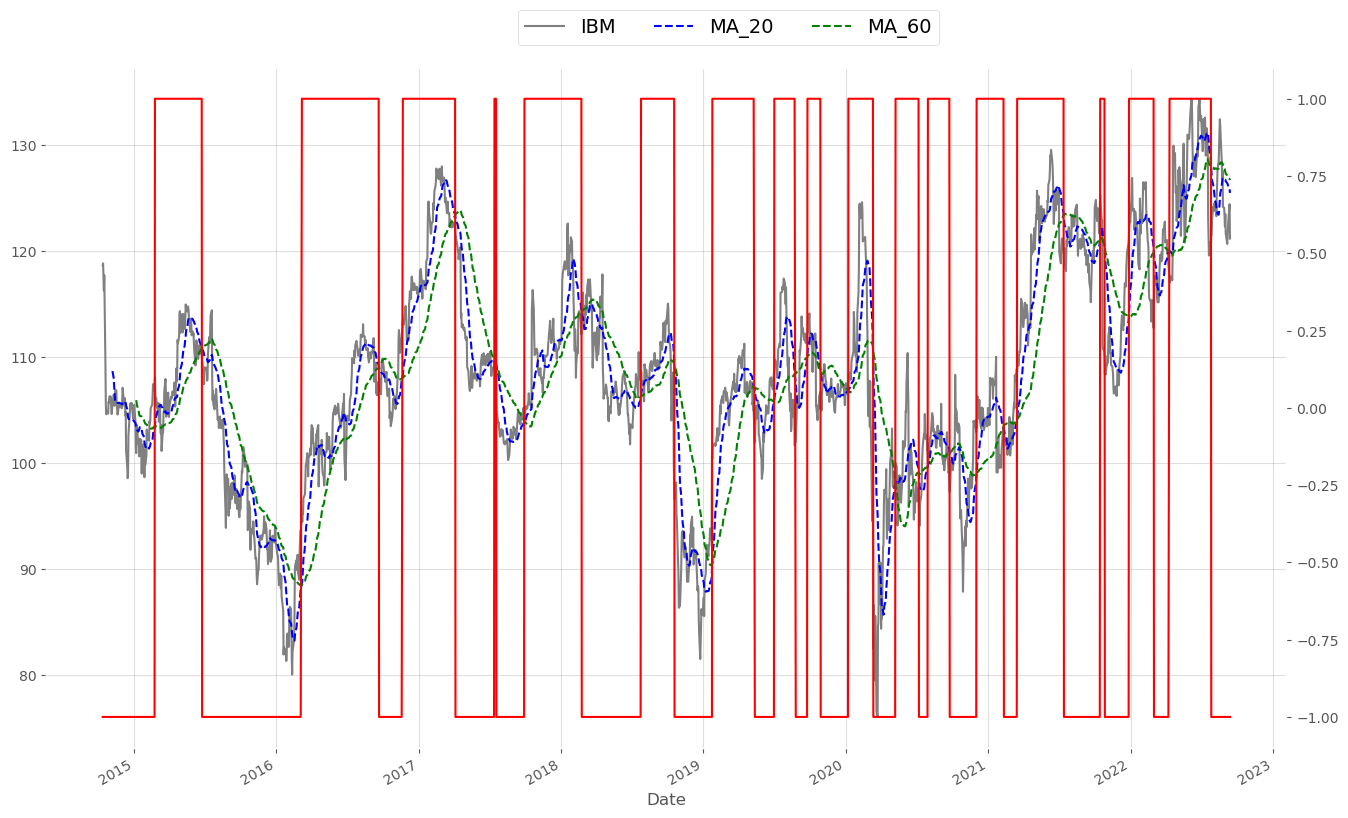

In [87]:
ax = (IBM.plot(figsize = [16,10],
               secondary_y = "trading_position", 
               style=["grey", "b--", "g--", "r"]
              )
     )

(ax.legend(loc = "upper center",
           bbox_to_anchor = (0.55, 1.10),
           ncol=4
          )
)

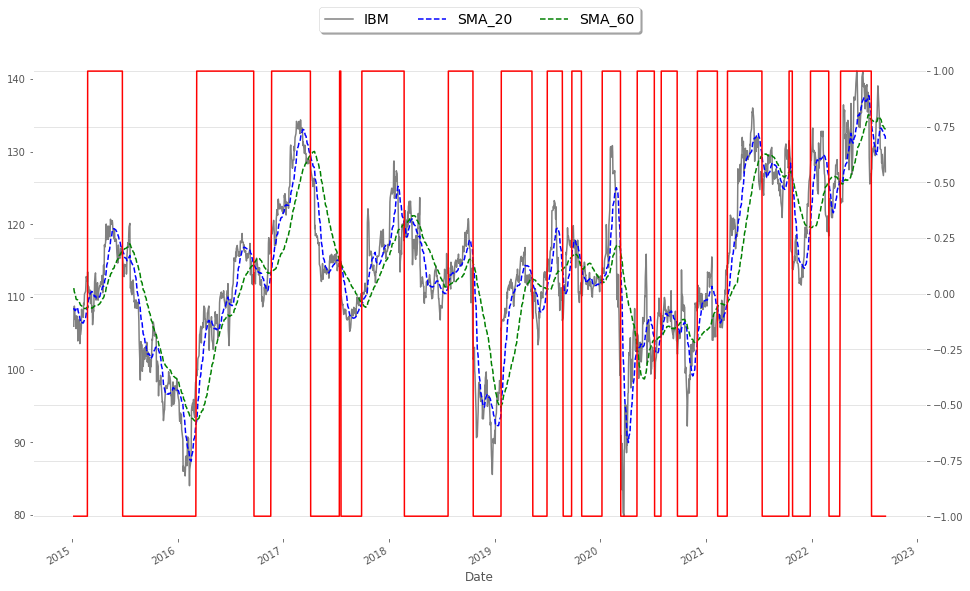

### <font color = red> Question 3</font>. Based on your lines of codes that lead to answer 2 above, compare the returns to see if the strategy leads to a win over the passive benchmark investment.

In [93]:
IBM["log_return"] = \
(
    np
    .log(IBM["IBM"]/IBM["IBM"].shift(1)
        )
)

In [95]:
#1 long, -1 short
IBM["strategy_return"] =\
(
    IBM["trading_position"]
    .shift(1)
    *
    IBM["log_return"]
)

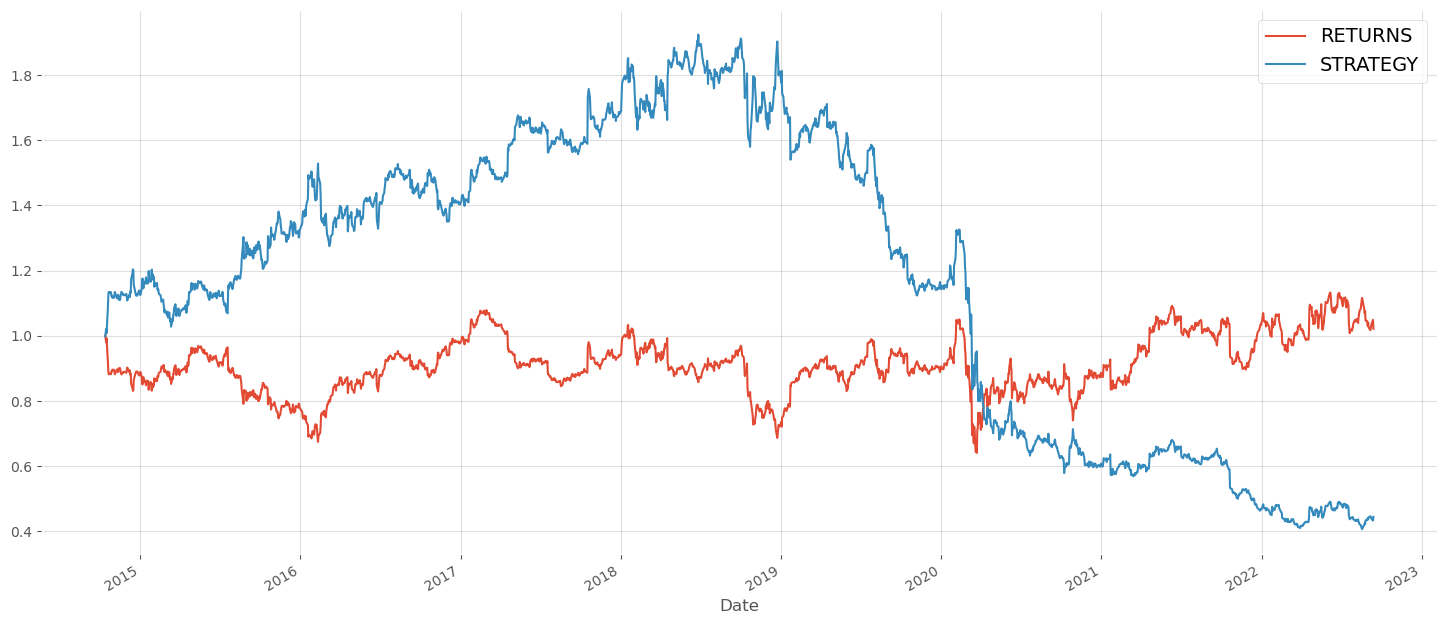

In [102]:
ax =\
(
    IBM[["log_return", "strategy_return"]]
    .cumsum()
    .apply(np.exp)
    .plot(figsize=[18,8]
         )
)

ax.legend(labels=["RETURNS", "STRATEGY"])

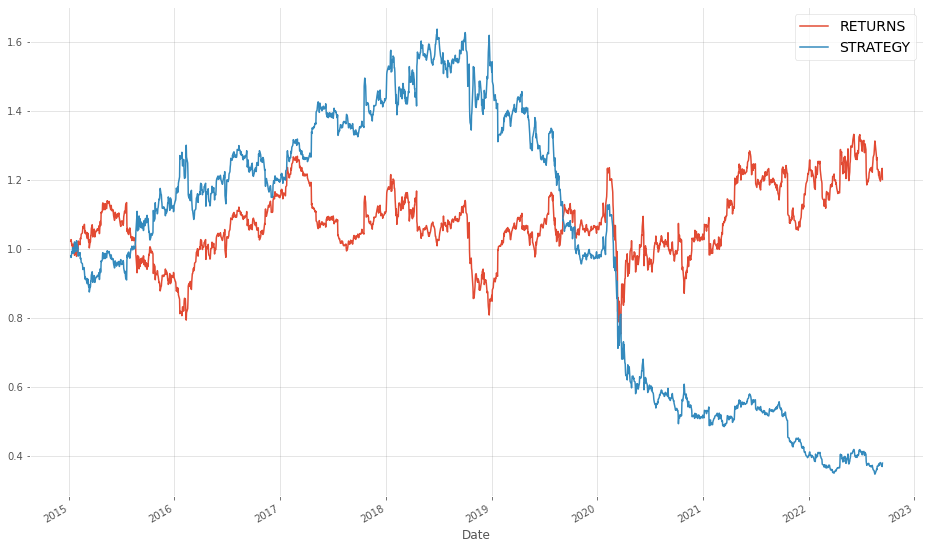

### <font color = red> Question 4</font>. Based on your lines of codes that lead to answer 3 above, please calculate the maximum drawdown and the longest drawdown period.

In [103]:
IBM["cumulative_return"] = IBM["strategy_return"].cumsum().apply(np.exp)

In [104]:
IBM["max_gross_performance"] =\
(
    IBM["cumulative_return"]
    .cummax()
)

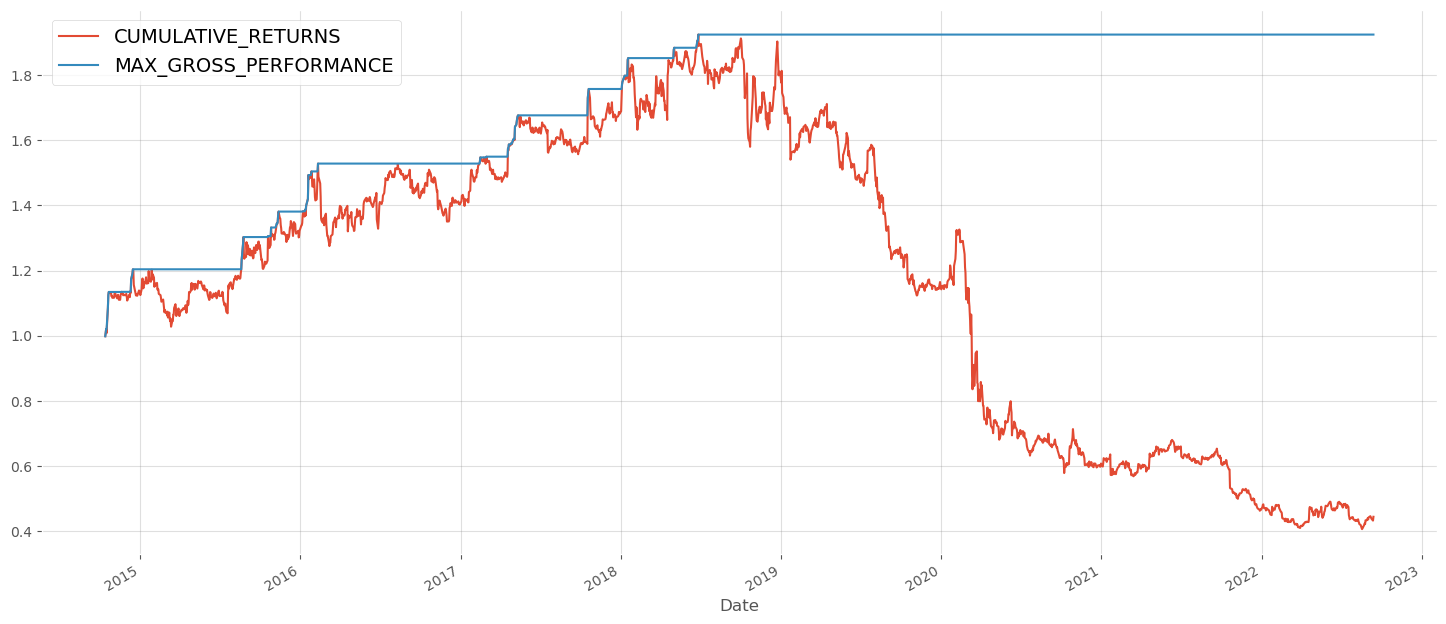

In [106]:
ax = IBM[["cumulative_return", "max_gross_performance"]].plot(figsize=[18,8])
ax.legend(labels=["CUMULATIVE_RETURNS", "MAX_GROSS_PERFORMANCE"])

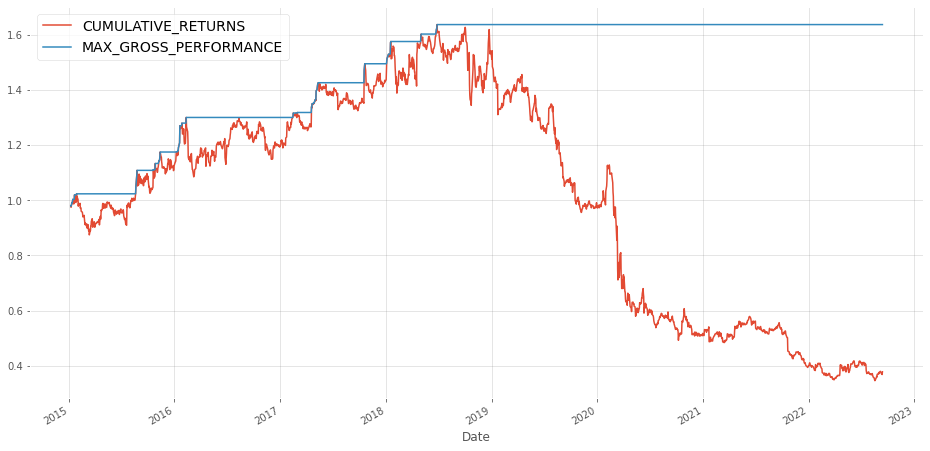

In [111]:
drawdown = IBM["max_gross_performance"] - IBM["cumulative_return"]
drawdown

Date
2014-10-13         NaN
2014-10-14    0.000000
2014-10-15    0.000000
2014-10-16    0.000000
2014-10-17    0.012388
                ...   
2022-09-07    1.480501
2022-09-08    1.483122
2022-09-09    1.485578
2022-09-12    1.490506
2022-09-13    1.478899
Length: 1994, dtype: float64

In [112]:
drawdown.max()

1.516700254507163

In [113]:
periods =\
(
    drawdown[drawdown == 0].index[1:].to_pydatetime()
    -
    drawdown[drawdown == 0].index[:-1].to_pydatetime()
)

In [114]:
periods.max()

datetime.timedelta(days=369)

### Please make sure to answer below.

    The maximum drawdown is about 152 percentage points.
    The longest drawdown period lasts for 369 days.

### <font color = red> Question 5</font>. Now let’s have a look at the stock price of Walmart (WMT). Please create your strategy based on mean-reversion strategy.

### Here, specifically, please implement a mean-reversion strategy on the basis of a `Simple Moving Average of 41 days` and a `threshold value of 4 for the absolute deviation of the current price` to deviate from the Simple Moving Average to signal a positioning.

In [117]:
WMT =\
(
    pdr
    .get_data_yahoo("WMT",
                    start = dt.datetime(2014,10,13),
                    end = dt.datetime(2022,9,14)
                   )
)

[*********************100%%**********************]  1 of 1 completed


In [119]:
WMT["SMA_41"] =\
(
    WMT["Adj Close"]
    .rolling(window=41)
    .mean()
)

In [120]:
threshold = 4

In [124]:
WMT["distance"] = WMT["Adj Close"] - WMT["SMA_41"]

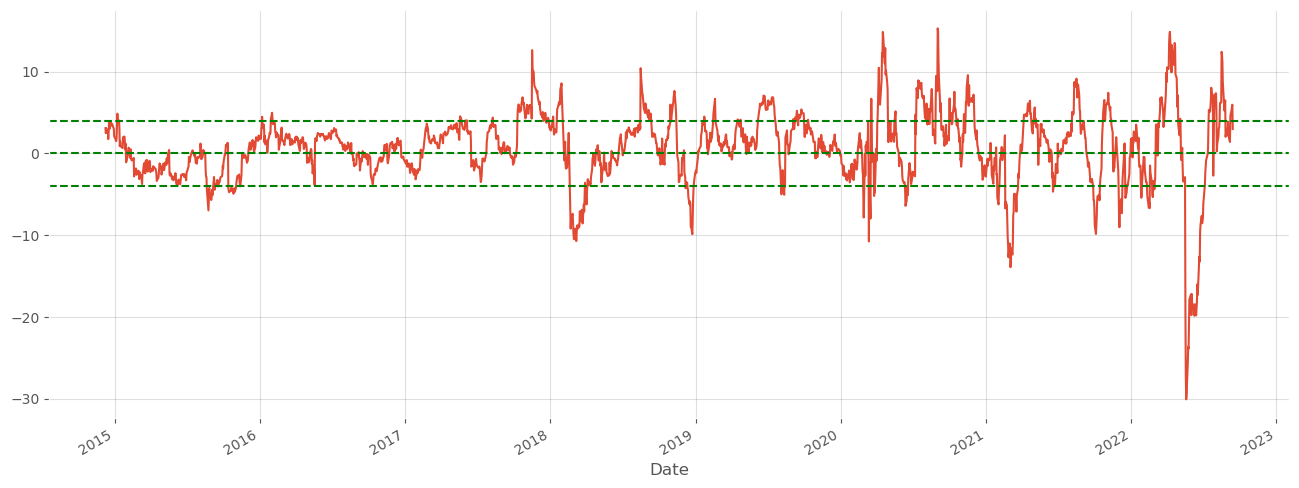

In [126]:
WMT["distance"].dropna().plot(figsize = [16,6])

plt.axhline(threshold, color = "green", ls='--')
plt.axhline(0, color = "green", ls='--')
plt.axhline(-threshold, color = "green", ls='--')

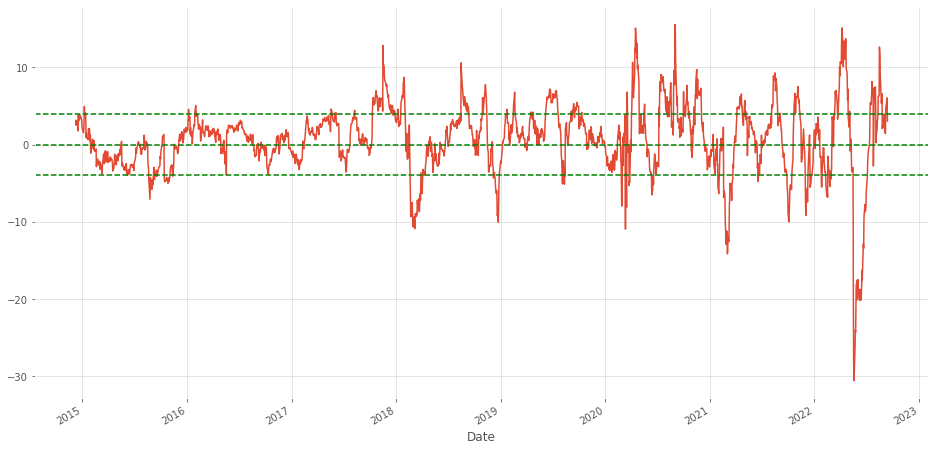

### <font color = red> Question 6</font> Now, please plot your buy positions using red dots, and your sell positions using blue dots, as shown below.

In [127]:
WMT["trading_positions"] =\
(
    np
    .where(WMT["distance"] > threshold,
           -1,
           np.nan
          )
)

WMT["trading_positions"] =\
(
    np
    .where(WMT["distance"] < -threshold,
           1,
           WMT["trading_positions"]
          )
)

WMT["trading_positions"] =\
(
    np
    .where(WMT["distance"]*WMT["distance"].shift(1) < 0,
           0,
           WMT["trading_positions"]
          )
)

WMT["trading_positions"] =\
(
    WMT["trading_positions"]
    .ffill()
)

<Axes: xlabel='Date'>

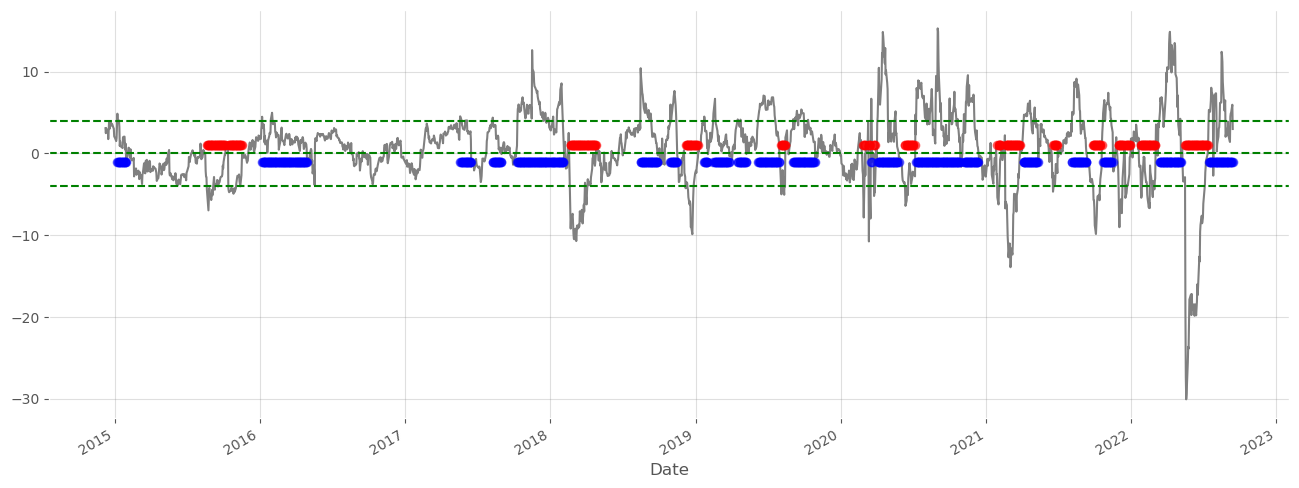

In [139]:
WMT["distance"].dropna().plot(figsize = [16,6], color="grey")

plt.axhline(threshold, color = "green", ls='--')
plt.axhline(0, color = "green", ls='--')
plt.axhline(-threshold, color = "green", ls='--')

WMT[WMT["trading_positions"] == 1]["trading_positions"].plot(color = "red", style = "o", alpha = 0.5)
WMT[WMT["trading_positions"] == -1]["trading_positions"].plot(color = "blue", style = "o",alpha = 0.5)

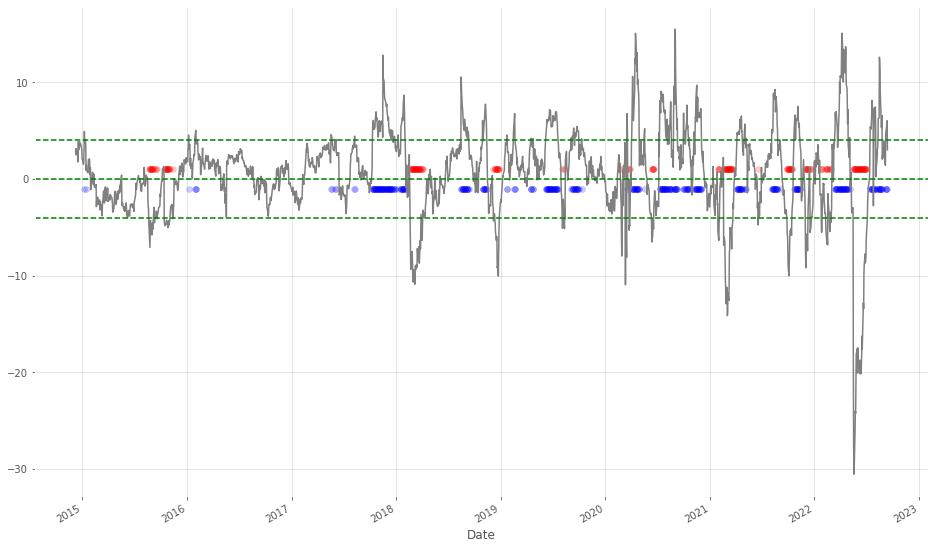

### Then, please come up with an answer for the question below.

    Based on mean-reversion strategy, there were _______ trading opportunities found.

### <font color = red> Question 7</font> Please draw the strategy returns as shown below.

In [141]:
WMT["RETURNS"] = np.log(WMT["Adj Close"]/WMT["Adj Close"].shift(1))

In [142]:
WMT["STRATEGY"] = WMT["trading_positions"].shift(1)*WMT["RETURNS"]

<Axes: xlabel='Date'>

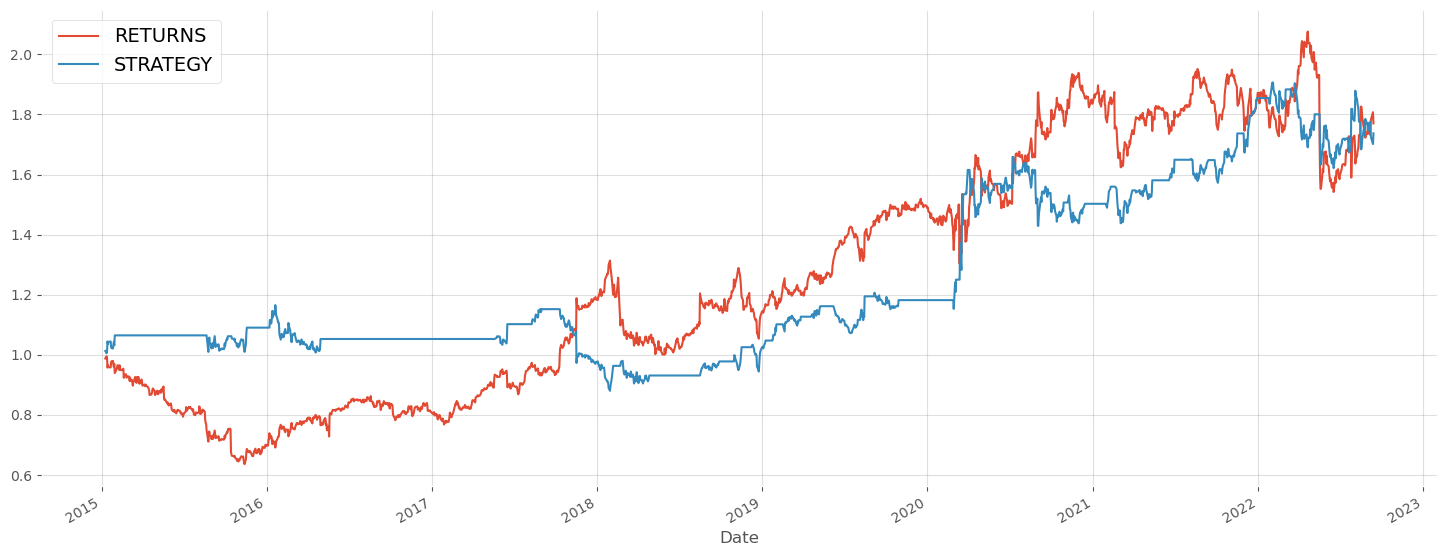

In [143]:
WMT[["RETURNS", "STRATEGY"]].dropna().cumsum().apply(np.exp).plot(figsize = [18,7])

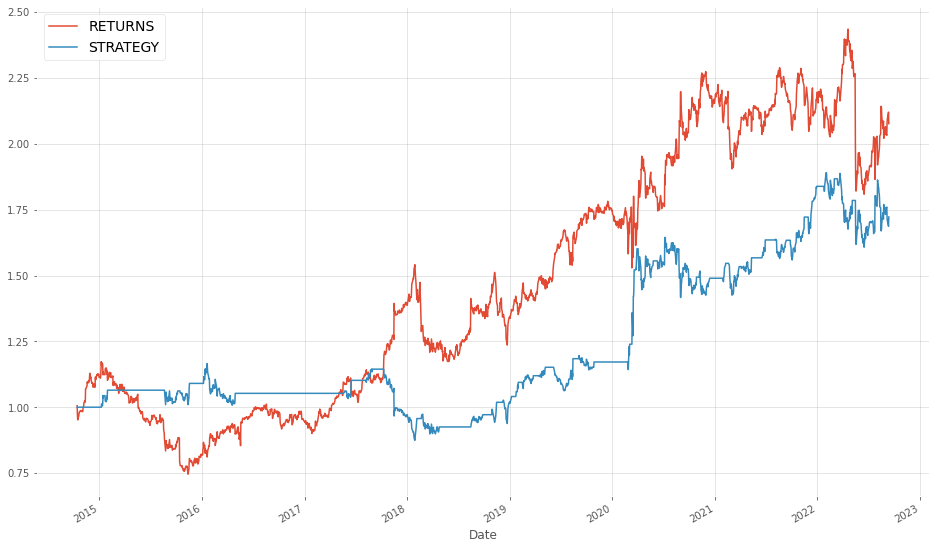

### <font color = red> Question 8</font>. Please calculate the Sharpe Ratio of the strategies for `IBM` and `WMT`, respectively.

    Simple moving strategy for IBM leads to a Sharpe ratio of ___-0.293______ . 

    Mean reversion strategy for WMT leads to a Sharpe ratio of ___0.524______ .

In [157]:
#assume R_f = 0
sharpe_ratio_WMT = np.sqrt(253)*(WMT["STRATEGY"].apply(np.exp) - 1).mean()/(WMT["STRATEGY"].apply(np.exp) - 1).std()
sharpe_ratio_WMT

0.5244544895929526

In [159]:
#assume R_f = 0
sharpe_ratio_IBM =\
(
    np.sqrt(253)
    *
    (IBM["strategy_return"].apply(np.exp) - 1).mean()
    /
    (IBM["strategy_return"].apply(np.exp) - 1).std()
)
sharpe_ratio_IBM

-0.29256430481818657

### <font color = red> Question 9</font>. Please calculate the Compound Annual Growth Rate (CAGR) of the strategies for `IBM` and `WMT`, respectively.

    Simple moving strategy for IBM leads to a CAGR of _________ . 

    Mean reversion strategy for WMT leads to a CAGR of _________ .


In [17]:
import math

In [173]:
days = (IBM.index[-1] - IBM.index[0]).days

In [174]:
CAGR_IBM = (math.exp(IBM["strategy_return"].sum()))**(365/days)-1
CAGR_IBM

-0.09720411199333767

In [176]:
CAGR_WMT =\
(
    math
    .exp(WMT["STRATEGY"].sum())
    **
    (365/days)
    -
    1
)
CAGR_WMT

0.07220937901036817

### <font color = red> Question 10</font>. This question is based on the following scenario. After reading it, please respond to the associated sub-questions.

> Scenario: You've been appointed as a Quantitative Researcher in the process-driven investing division of a leading hedge fund. As part of your onboarding challenge, you are handed data (`alphas.csv`) for three experimental trading models, codenamed Alphas A, B, and C. These models, each initiated with a capital of 100K, demonstrate nearly identical Sharpe ratios across a span of 1120 trading days. Intrigued by this uniformity yet aware of the Sharpe ratio's shortcomings, you embark on a journey to dissect the Alphas' performance through a multifaceted quantitative lens.

> 10-1. Sharpe Ratio Diagnostics:

- Given the daily return series for Alphas A, B, and C:

- Derive the annualized Sharpe ratio for each Alpha, with the industry-standard assumption of 252 trading days per annum. In light of these findings, how might you reconsider the perceived risk-adjusted returns of these models?



In [42]:
data = pd.read_csv("alphas.csv", index_col=0)
data.head(2)

,Alphas A,Alphas B,Alphas C
2019-05-28,100.000000,100.000000,100.000000
2019-05-29,100.562415,101.991696,100.733993


In [43]:
data.columns

Index(['Alphas A', 'Alphas B', 'Alphas C'], dtype='object')

In [44]:
for c_name in data.columns:
    data[c_name + "_return"] = np.log(data[c_name]/data[c_name].shift(1))

In [45]:
data.head(3)

,Alphas A,Alphas B,Alphas C,Alphas A_return,Alphas B_return,Alphas C_return
2019-05-28,100.000000,100.000000,100.000000,NaN,NaN,NaN
2019-05-29,100.562415,101.991696,100.733993,0.005608,0.019721,0.007313
2019-05-30,98.903615,104.527038,100.568916,-0.016633,0.024554,-0.001640


In [67]:
(
    np
    .sqrt(253)
    *
    (np.exp(data.iloc[:,[3,4,5]])-1).mean()
    /
    (np.exp(data.iloc[:,[3,4,5]])-1).std()
)

Alphas A_return   -0.058027
Alphas B_return   -0.067968
Alphas C_return   -0.062903
dtype: float64

> 10-2. Trajectory of Cumulative Returns:
    
- Visualize and compare the cumulative returns of each Alpha.


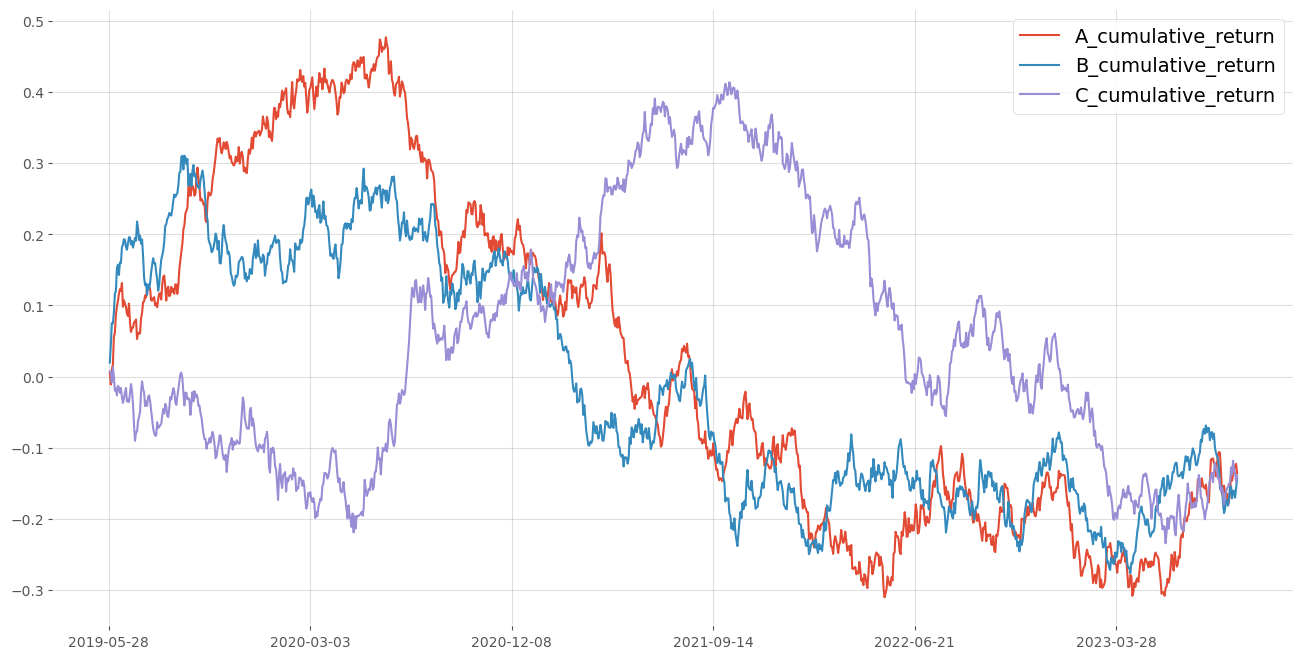

In [47]:
ax = data.iloc[:,[3,4,5]].cumsum().plot(figsize=[16,8])
ax.legend(labels=["A_cumulative_return","B_cumulative_return","C_cumulative_return"])

   10-3. Cumulative Returns Over a 1120-Day Horizon:
- Extrapolate the cumulative returns for each Alpha over this period. When evaluating based on the Compound Annual Growth Rate (CAGR), how do these Alphas stack up against one another?

In [48]:
days = (dt.datetime.strptime(data.index[-1],"%Y-%m-%d")-dt.datetime.strptime(data.index[1],"%Y-%m-%d")).days
days

1567

In [49]:
np.exp(data.iloc[:,[3,4,5]].sum())**(365/days)-1

Alphas A_return   -0.031138
Alphas B_return   -0.032863
Alphas C_return   -0.031873
dtype: float64

> 10.4 Delving into Maximum Drawdown (MDD):
- Assess the Maximum Drawdown (MDD) for each model within this time frame. Based on this assessment, which Alpha appears best equipped to withstand market downturns?



In [50]:
data.iloc[:,[0,1,2]].columns

Index(['Alphas A', 'Alphas B', 'Alphas C'], dtype='object')

In [51]:
for c_name in data.iloc[:,[0,1,2]].columns:
    data[c_name + "_cumulative_return"] = data[c_name + "_return"].cumsum().apply(np.exp)
    data[c_name + "_max_gross_performance"] = data[c_name + "_cumulative_return"].cummax()
    data[c_name + "drawdown"] = data[c_name + "_max_gross_performance"] - data[c_name + "_cumulative_return"]

In [52]:
for c_name in data.iloc[:,[0,1,2]].columns:
    print(data[c_name + "drawdown"].max())

0.877231802631283
0.6052287367482283
0.7210010902745291


In [54]:
data

,Alphas A,Alphas B,Alphas C,Alphas A_return,Alphas B_return,Alphas C_return,Alphas A_cumulative_return,Alphas A_max_gross_performance,Alphas Adrawdown,Alphas B_cumulative_return,Alphas B_max_gross_performance,Alphas Bdrawdown,Alphas C_cumulative_return,Alphas C_max_gross_performance,Alphas Cdrawdown
2019-05-28,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-29,100.562415,101.991696,100.733993,0.005608,0.019721,0.007313,1.005624,1.005624,0.000000,1.019917,1.019917,0.000000,1.007340,1.007340,0.000000
2019-05-30,98.903615,104.527038,100.568916,-0.016633,0.024554,-0.001640,0.989036,1.005624,0.016588,1.045270,1.045270,0.000000,1.005689,1.007340,0.001651
2019-05-31,101.046406,107.799053,99.186270,0.021434,0.030823,-0.013844,1.010464,1.010464,0.000000,1.077991,1.077991,0.000000,0.991863,1.007340,0.015477
2019-06-03,101.649234,107.750748,101.323467,0.005948,-0.000448,0.021318,1.016492,1.016492,0.000000,1.077507,1.077991,0.000483,1.013235,1.013235,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-06,87.171517,85.212876,88.864669,0.008753,0.010879,0.019709,0.871715,1.610776,0.739061,0.852129,1.363998,0.511869,0.888647,1.512298,0.623652
2023-09-07,87.770479,85.143390,87.782382,0.006848,-0.000816,-0.012254,0.877705,1.610776,0.733071,0.851434,1.363998,0.512564,0.877824,1.512298,0.634475
2023-09-08,88.204118,84.376805,87.391530,0.004928,-0.009044,-0.004462,0.882041,1.610776,0.728735,0.843768,1.363998,0.520229,0.873915,1.512298,0.638383
2023-09-11,88.475733,85.531184,86.241478,0.003075,0.013588,-0.013247,0.884757,1.610776,0.726019,0.855312,1.363998,0.508686,0.862415,1.512298,0.649884


> 10.5 Examining Drawdown Duration:
- Analyze the longest drawdown durations for each strategy. Which of the Alphas seems to have the quickest recovery mechanism following a significant drawdown?


In [62]:
data.index = pd.to_datetime(data.index)

In [65]:
for c_name in data.iloc[:,[0,1,2]].columns:
    print((
        data[data[c_name + "drawdown"] == 0][c_name + "drawdown"].index[1:].to_pydatetime()
        - 
        data[data[c_name + "drawdown"] == 0][c_name + "drawdown"].index[:-1].to_pydatetime() 
    ).max())

59 days, 0:00:00
42 days, 0:00:00
409 days, 0:00:00


> 10.6 Comprehensive Assessment of Strategy Performance:
- By synthesizing data from metrics such as the Sharpe ratio, cumulative returns trajectory, MDD, and drawdown duration, provide a well-rounded analysis of the three Alphas. Rank and justify your recommendations based on your quantitative insights.


In [74]:
assessment = {'sharp_ratio': [-0.058027,-0.067968, -0.0629031],
              'MDD': [0.877231802631283,0.6052287367482283,0.7210010902745291],
              "drawdown_duration":[59,42,409],
              "rank_1":[1,3,2],
              "rank_2":[3,1,2],
              "rank_3":[2,1,3]
             }
df_ass = pd.DataFrame(assessment)
df_ass.index = ["A","B","C"]
df_ass

,sharp_ratio,MDD,drawdown_duration,rank_1,rank_2,rank_3
A,-0.058027,0.877232,59,1,3,2
B,-0.067968,0.605229,42,3,1,1
C,-0.062903,0.721001,409,2,2,3


In [81]:
df_ass.iloc[:,[3,4,5]].sum(axis=1).sort_values()

B    5
A    6
C    7
dtype: int64


> 10.7 Reflecting on the Sharpe Ratio:
- Given the observed disparities in cumulative returns and MDD among the Alphas, even with similar Sharpe ratios, evaluate the effectiveness of relying solely on the Sharpe ratio. Can you propose additional or refined metrics to differentiate between Alphas with matching Sharpe values but varying performances in other critical areas?

Can use all matric mentioned above, and rank the alpha, sum all the rankings, which alpha get the min numer ace.

### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>